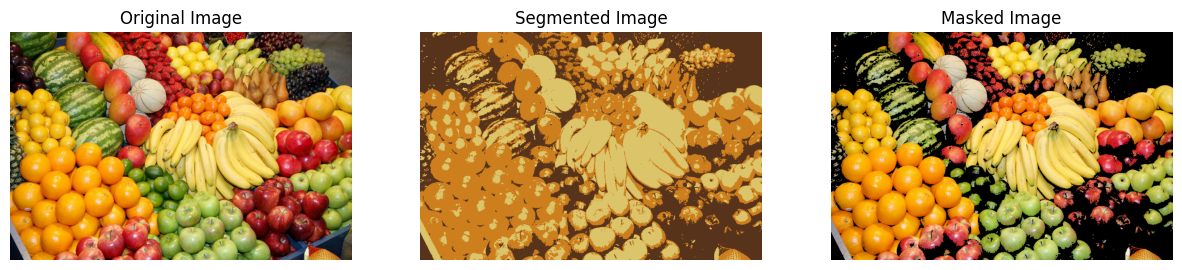

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_image(file_path):
    """Read the image and convert it to RGB."""
    image = cv2.imread(file_path)
    if image is None:
        raise FileNotFoundError(f"Failed to read file: {file_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def preprocess_image(image):
    """Reshape the image to a 2D array of pixels and 3 color values (RGB) and convert to float."""
    pixel_values = image.reshape((-1, 3))
    return np.float32(pixel_values)

def perform_kmeans_clustering(pixel_values, k=3):
    """Perform k-means clustering on the pixel values."""
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    return compactness, labels, np.uint8(centers)

def create_segmented_image(pixel_values, labels, centers):
    """Create a segmented image using the cluster centroids."""
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)

def create_masked_image(image, labels, cluster_to_disable):
    """Create a masked image by disabling a specific cluster."""
    masked_image = np.copy(image).reshape((-1, 3))
    masked_image[labels.flatten() == cluster_to_disable] = [0, 0, 0]
    return masked_image.reshape(image.shape)

def visualize_segmentation(image, segmented_image, masked_image):
    """Display the original image, segmented image, and masked image side by side."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")

    axes[1].imshow(segmented_image)
    axes[1].set_title("Segmented Image")

    axes[2].imshow(masked_image)
    axes[2].set_title("Masked Image")

    for ax in axes:
        ax.axis('off')

    plt.show()

def kmeans_segment_fruits(image_path, k=3, cluster_to_disable=2):
    """Segment fruits in the input image using K-Means clustering."""
    image = read_image(image_path)
    pixel_values = preprocess_image(image)
    compactness, labels, centers = perform_kmeans_clustering(pixel_values, k)
    segmented_image = create_segmented_image(pixel_values, labels, centers)
    masked_image = create_masked_image(image, labels, cluster_to_disable)
    visualize_segmentation(image, segmented_image, masked_image)

if __name__ == "__main__":
    # Replace "fruits.jpg" with the actual path to your image file
    image_path = "fruits.jpg"

    # Set the number of clusters (K) and the cluster to disable
    k = 3
    cluster_to_disable = 2

    kmeans_segment_fruits(image_path, k, cluster_to_disable)
